***Statistical Analysis of Retail Sales Using Hypothesis Testing and ANOVA (Superstore Dataset)***

🔹 Research Questions (Mapped to Your Dataset)
Q1️⃣ Does discount significantly affect average sales?

Groups: Discounted vs Non-discounted

Test: Two-sample t-test

Q2️⃣ Do different product categories have different average sales?

Groups: Furniture, Office Supplies, Technology

Test: One-Way ANOVA

Q3️⃣ Is customer segment dependent on product category?

Variables: Segment × Category

Test: Chi-Square Test of Independence



***Importing libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


Data loading


In [ ]:
"df = pd.read_csv("../data/superstore.csv", encoding="latin1")


In [3]:
df.head(5)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,è®°å½æ°,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [4]:
df.shape


(51290, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   è®°å½æ°       51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [6]:
df.columns = df.columns.str.strip().str.replace('.', '_').str.replace(' ', '_')
df.columns

Index(['Category', 'City', 'Country', 'Customer_ID', 'Customer_Name',
       'Discount', 'Market', 'è®°å½æ°', 'Order_Date', 'Order_ID',
       'Order_Priority', 'Product_ID', 'Product_Name', 'Profit', 'Quantity',
       'Region', 'Row_ID', 'Sales', 'Segment', 'Ship_Date', 'Ship_Mode',
       'Shipping_Cost', 'State', 'Sub_Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

***Data Cleaning AND Prepocessing***

In [7]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('.', '_')
)

df.drop(df.columns[7], axis=1, inplace=True)



In [8]:
df.isnull().sum()


Category          0
City              0
Country           0
Customer_ID       0
Customer_Name     0
Discount          0
Market            0
Order_Date        0
Order_ID          0
Order_Priority    0
Product_ID        0
Product_Name      0
Profit            0
Quantity          0
Region            0
Row_ID            0
Sales             0
Segment           0
Ship_Date         0
Ship_Mode         0
Shipping_Cost     0
State             0
Sub_Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [9]:
for i, col in enumerate(df.columns):
    print(i, repr(col))


0 'Category'
1 'City'
2 'Country'
3 'Customer_ID'
4 'Customer_Name'
5 'Discount'
6 'Market'
7 'Order_Date'
8 'Order_ID'
9 'Order_Priority'
10 'Product_ID'
11 'Product_Name'
12 'Profit'
13 'Quantity'
14 'Region'
15 'Row_ID'
16 'Sales'
17 'Segment'
18 'Ship_Date'
19 'Ship_Mode'
20 'Shipping_Cost'
21 'State'
22 'Sub_Category'
23 'Year'
24 'Market2'
25 'weeknum'


**DESCRIPTIVE STATISTICS (NumPy + Business Insight)**
--------------

In [10]:
#Select Numerical Columns
num_cols = ['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping_Cost']
df[num_cols].describe()


,Sales,Profit,Discount,Quantity,Shipping_Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,28.610982,0.142908,3.476545,26.375818
std,487.567175,174.340972,0.212280,2.278766,57.296810
min,0.000000,-6599.978000,0.000000,1.000000,0.002000
25%,31.000000,0.000000,0.000000,2.000000,2.610000
50%,85.000000,9.240000,0.000000,3.000000,7.790000
75%,251.000000,36.810000,0.200000,5.000000,24.450000
max,22638.000000,8399.976000,0.850000,14.000000,933.570000


In [11]:
#NumPy-Based Statistics
sales = df['Sales'].values
profit = df['Profit'].values
discount = df['Discount'].values


In [12]:
print(np.mean(sales))
print(np.mean(profit))
print(np.mean(discount))


246.49844024176252
28.610982477675964
0.14290754533047378


In [13]:
print(np.median(sales))
print(np.var(sales))
print(np.std(sales))
#Mean shows average order value, while standard deviation indicates variability in sales.

85.0
237717.11492250382
487.5624215651816


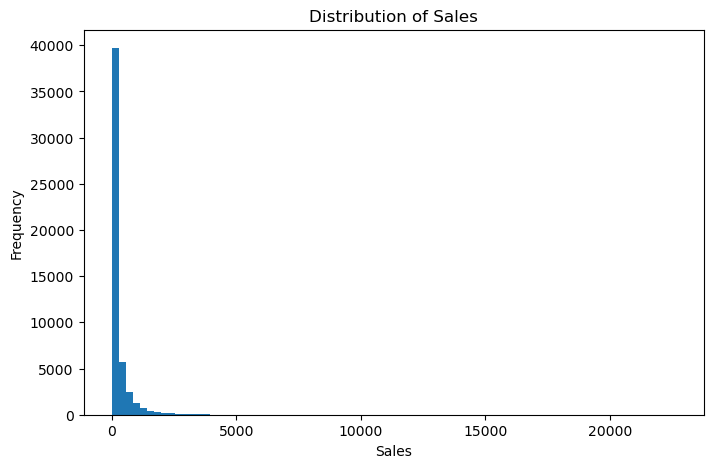

In [14]:
#Sales Distribution
plt.figure(figsize=(8,5))
plt.hist(sales, bins=80)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


In [15]:
#It shows Right-skewed distribution
#Few very large orders
#Most orders are small-value purchases


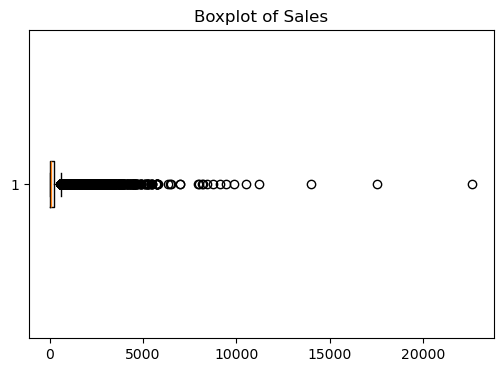

In [16]:
#Boxplot (Outlier Detection)
plt.figure(figsize=(6,4))
plt.boxplot(sales, vert=False)
plt.title("Boxplot of Sales")
plt.show()


In [17]:
#Outliers are present
#Some sales go:

#Beyond 10,000

#Even up to 20,000+

In [18]:
#Raw Sales data is NOT normally distributed
#Presence of outliers violates normality assumption
#Parametric tests on raw sales data must be applied carefully

In [19]:
#Outlier Detection using Z-score
z_scores = np.abs(stats.zscore(sales))
outliers = np.where(z_scores > 3)#How many sales values are more than 3 standard deviations away from the mean
len(outliers[0])


1019

In [20]:
#using Z-score based outlier detection not to remove data points, 
#but to quantify the presence of extreme values. 
#The analysis showed around 1,019 high-value sales transactions, 
#confirming that the sales data is highly skewed. 
#Since these represent genuine business transactions, 
#they were retained, and the Central Limit Theorem was used for valid statistical inference.

In [21]:
#The boxplot clearly indicates the presence of several high-value outliers,
#while the histogram shows that sales data is positively skewed.
# This means the raw data is not normally distributed. However, due to the large sample size, 
#the Central Limit Theorem allows us to perform statistical inference using sample means.

***CENTRAL LIMIT THEOREM (CLT)***
-------------

In [22]:
#Decide sample size & number of samples
#
np.random.seed(42)

sample_size = 30
num_samples = 1000


In [23]:
#Generate random samples & compute means
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(sales, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

#Randomly pick 30 sales values
#Compute mean
#Repeat 1000 times

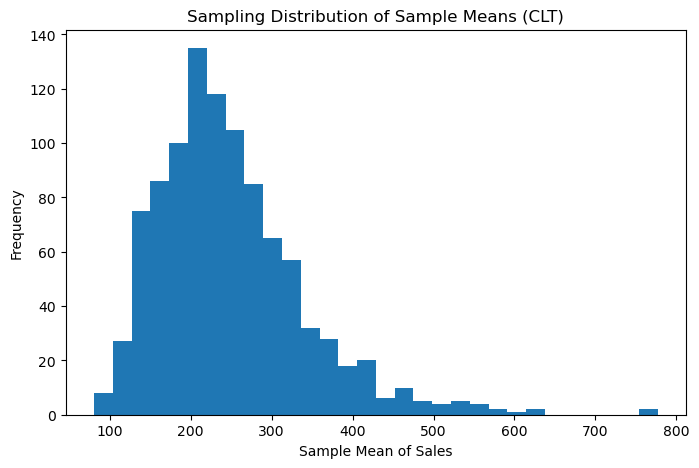

In [24]:
#Plot distribution of sample means
plt.figure(figsize=(8,5))
plt.hist(sample_means, bins=30)
plt.title("Sampling Distribution of Sample Means (CLT)")
plt.xlabel("Sample Mean of Sales")
plt.ylabel("Frequency")
plt.show()


In [25]:
np.mean(sales), np.mean(sample_means)


(246.49844024176252, 248.78353333333334)

In [26]:
np.std(sales), np.std(sample_means)  
#σx≈ σ/sqrt(n)



(487.5624215651816, 90.72467774024392)

In [27]:
#The raw sales data is highly skewed and contains outliers. Therefore, 
#direct normality assumptions are invalid. By repeatedly sampling data and analyzing the distribution of sample means, 
#we observe an approximately normal distribution. 
#This confirms the Central Limit Theorem and justifies the use of parametric statistical test

In [28]:
# As CLT shows normal Distribution we can legitimately apply:
#t-test
#One-Way ANOVA
#Two-Way ANOVA

***HYPOTHESIS TESTING (t-test) (Two-Sample t-Test)***
----------


***Business Question1:***

***Does offering a discount significantly change the average sales value?***

In [29]:
#We divide orders into two independent groups:
#Group 1: Orders with discount
#Group 2: Orders without discount

discounted_sales = df[df['Discount'] > 0]['Sales']
non_discounted_sales = df[df['Discount'] == 0]['Sales']


#State Hypotheses

***Null Hypothesis (H₀):***

There is no significant difference in average sales between discounted and non-discounted orders.

***𝐻o:μ discount=μ no discount***

______________________________________________________________________________________________________________________________________________________


***Alternative Hypothesis (H₁):***

There is a significant difference in average sales between discounted and non-discounted orders.

***𝐻1:μdiscount != μ no discount***

#This is a two-tailed test.

In [30]:
t_stat, p_value = stats.ttest_ind(
    discounted_sales,
    non_discounted_sales,
    equal_var=False
)

t_stat, p_value


(2.8906902802962864, 0.0038456823131213136)

In [31]:
if p_value < 0.05:
    print("Reject H₀")
else:
    print("Fail to Reject H₀")


Reject H₀


***Interpretation:***


***“There is a statistically significant difference in average sales between discounted and non-discounted orders.”***


***The statistical test suggests that discounting strategies have a significant impact on sales values, which can guide pricing and promotional decisions.***


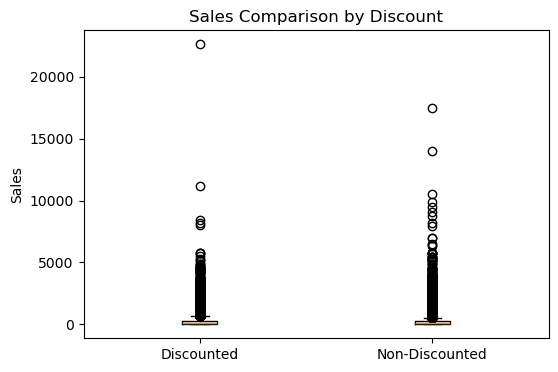

In [32]:
plt.figure(figsize=(6,4))
plt.boxplot([discounted_sales, non_discounted_sales],
            tick_labels=['Discounted', 'Non-Discounted'])
plt.title("Sales Comparison by Discount")
plt.ylabel("Sales")
plt.show()


***ONE-WAY ANOVA***
------------------------------

***Business Question:***

***Do different product categories generate different average sales?***

Category typically has:Furniture Office Supplies Technology
One-Way ANOVA compares 3 or more means at once

#Define Hypothesis:

***Null Hypothesis (H₀)***

The average sales are the same across all product categories.

***Ho:μFurniture = μOfficeSupplies = μTechnology***
______________________________________________________________________________________________________________________________________________
***Alternative Hypothesis (H₁)***

At least one category has a different average sales value.
	


In [33]:
df['Category'].value_counts()


Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

In [34]:
#Prepare Data for ANOVA
categories = df['Category'].unique()

grouped_sales = [
    df[df['Category'] == cat]['Sales']
    for cat in categories
]
#This creates one sales group per category.

In [35]:
f_stat, p_value = stats.f_oneway(*grouped_sales)

f_stat, p_value


(2990.2443588136007, 0.0)

In [36]:
#Decision Rule

#Significance level (α) = 0.05

In [37]:
if p_value < 0.05:
    print("Reject H₀")
else:
    print("Fail to Reject H₀")


Reject H₀


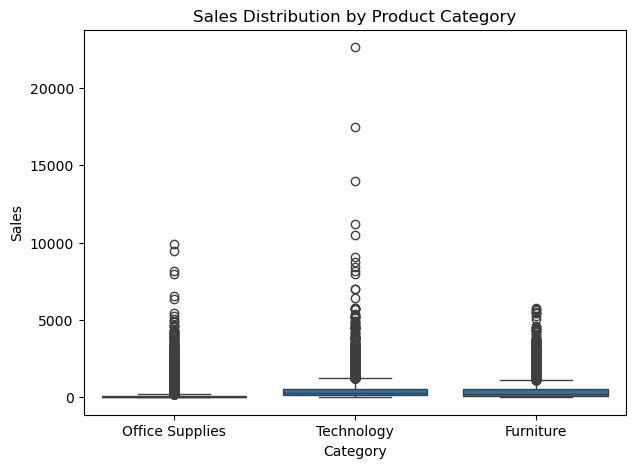

In [38]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title("Sales Distribution by Product Category")
plt.show()


***Conclusion:***


***The ANOVA results indicate that product category plays a significant role in determining sales value.***


***This insight can help businesses prioritize high-performing categories.***


CHI-SQUARE TEST OF INDEPENDENCE
-------------------------------------

***Business Questions***

***Is customer segment dependent on product category?***

In [44]:
#Chi square test is used in categorical data
#So we will use Categorical Variable 1:

#categorical Variable 1:
#Segment
#(Consumer / Corporate / Home Office)

#Categorical Variable 2:
#Category
#(Furniture / Office Supplies / Technology)

#we are using Chi square as We want to test association, not mean

***Step 1: State Hypotheses***


***Null Hypothesis (H₀):***
Customer Segment and Product Category are independent.


***Alternative Hypothesis (H₁)***
Customer Segment and Product Category are dependent.

In [45]:
#creating Observed Frequencies table first.
contingency_table = pd.crosstab(df['Segment'], df['Category'])
contingency_table


Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,5095,16151,5272
Corporate,3014,9364,3051
Home Office,1767,5758,1818


In [46]:
#Performing Chi square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

chi2, p_value, dof


(2.7235431282237634, 0.6051011989659332, 4)

In [48]:
expected_df = pd.DataFrame(
    expected,
    index=contingency_table.index,
    columns=contingency_table.columns
)

expected_df


Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,5106.098031,16168.793410,5243.108559
Corporate,2970.887190,9407.508618,3050.604192
Home Office,1799.014779,5696.697972,1847.287249


In [47]:
#Significance level α = 0.05
if p_value < 0.05:
    print("Reject H₀")
else:
    print("Fail to Reject H₀")


Fail to Reject H₀


***Conclusion***


***The Chi-Square test resulted in a p-value greater than 0.05,so we failed to reject the null hypothesis.***


***This indicates that customer segment and product category are statistically independent,***
***meaning purchasing patterns across categories are similar for different customer types.***